In [45]:
import seaborn as sns
import numpy as np
import pandas as pd
SEED = 2021
N = 50  # observations
rng = np.random.default_rng(SEED)


In [51]:
X = np.arange(N)
sample_size = (10, 5)
subsets = rng.choice(X, sample_size, replace=False)
subsets = pd.DataFrame(subsets)
sns.heatmap(subsets, cmap='Spectral')


,0,1,2,3,4
0,40,35,26,21,0
1,39,45,12,43,41
2,20,46,33,38,23
3,14,4,5,11,30
4,37,22,2,3,48
5,49,31,32,28,6
6,47,25,10,24,9
7,36,1,13,8,7
8,15,19,27,16,34
9,18,44,29,42,17


<AxesSubplot:>

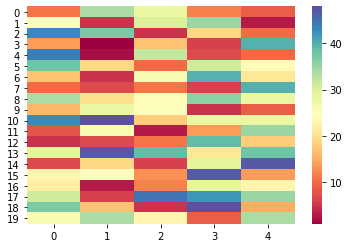

In [59]:
X = np.arange(N)
sample_size = (20, 5)  # 20 obs over 5 folds
subsets = rng.choice(X, sample_size, replace=True)
subsets = pd.DataFrame(subsets)
sns.heatmap(subsets, cmap='Spectral')


In [43]:
%%timeit
sample_size = (10, 5)
X = np.arange(N)
rng.shuffle(X)
pd.DataFrame(X.reshape(sample_size))


53.4 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [44]:
pd.DataFrame(X.reshape(sample_size))


,0,1,2,3,4
0,8,11,46,21,42
1,9,34,48,17,39
2,44,29,14,10,20
3,4,30,32,6,27
4,31,13,7,16,23
5,36,35,0,41,5
6,25,33,43,15,26
7,2,45,40,1,37
8,22,3,18,49,47
9,24,38,12,28,19


In [39]:
X = np.arange(N)


In [40]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [41]:
rng.shuffle(X)
X

array([ 8, 11, 46, 21, 42,  9, 34, 48, 17, 39, 44, 29, 14, 10, 20,  4, 30,
       32,  6, 27, 31, 13,  7, 16, 23, 36, 35,  0, 41,  5, 25, 33, 43, 15,
       26,  2, 45, 40,  1, 37, 22,  3, 18, 49, 47, 24, 38, 12, 28, 19])

In [42]:
X.reshape(sample_size)


array([[ 8, 11, 46, 21, 42],
       [ 9, 34, 48, 17, 39],
       [44, 29, 14, 10, 20],
       [ 4, 30, 32,  6, 27],
       [31, 13,  7, 16, 23],
       [36, 35,  0, 41,  5],
       [25, 33, 43, 15, 26],
       [ 2, 45, 40,  1, 37],
       [22,  3, 18, 49, 47],
       [24, 38, 12, 28, 19]])

In [72]:
Y = rng.choice([-1, 0, 1], N, p=(0.25,0.45,0.3))


In [85]:
%%time
dummy = pd.get_dummies(Y)


CPU times: user 810 µs, sys: 94 µs, total: 904 µs
Wall time: 840 µs


In [102]:
X = np.arange(N)
ratio, groups = (0.25, 0.45, 0.3), [0, 1, 2]
Y = rng.choice(groups, N, p=ratio)  # the factor to stratify
dummy = np.eye(len(groups))[Y]
folds, sample_size = 5, 20
subsets = []
for i, k in enumerate(np.array(ratio)*sample_size):
    _X = X[dummy[:, i] == 1]
    subsets.append(pd.DataFrame(rng.choice(_X, (k, folds)))




SyntaxError: unexpected EOF while parsing (<ipython-input-102-7a3c7081cea5>, line 11)

<AxesSubplot:>

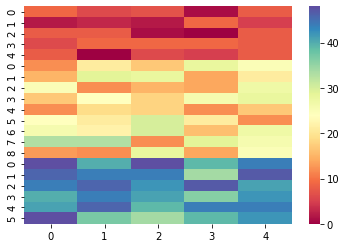

In [154]:
X = np.arange(N)
ratio, groups = (0.25, 0.45, 0.3), [0, 1, 2]
Y = np.repeat(groups, (np.array(ratio)*N).astype(int))
folds, sample_size = 5, 20
subset_size = np.array(ratio)*sample_size
dummy = np.eye(len(groups))[Y]
subsets = []
for i, k in enumerate(subset_size):
    _X = X[np.where(dummy[:, i] == 1)[0]]
    subsets.append(pd.DataFrame(rng.choice(_X, (int(k), folds))))
subsets = pd.concat(subsets)
sns.heatmap(subsets, cmap='Spectral')


<AxesSubplot:>

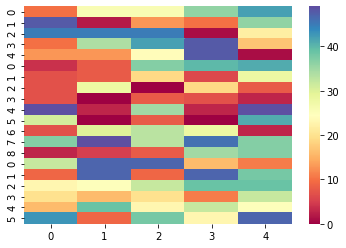

In [155]:
X = np.arange(N)
ratio, groups = (0.25, 0.45, 0.3), [0, 1, 2]
Y = rng.choice(groups, N, p=ratio)  # the factor to stratify
dummy = np.eye(len(groups))[Y]
folds, sample_size = 5, 20
subset_size = np.array(ratio)*sample_size
subsets = []
for i, k in enumerate(subset_size):
    _X = X[np.where(dummy[:, i] == 1)[0]]
    subsets.append(pd.DataFrame(rng.choice(_X, (int(k), folds))))
subsets = pd.concat(subsets)
sns.heatmap(subsets, cmap='Spectral')


In [122]:
Y = np.hstack([np.ones((int(k),))*(i+1) for i, k in enumerate(subset_size)]).flatten()


In [144]:
np.round(np.array(ratio)*N)


array([12., 22., 15.])

In [152]:
(np.array(ratio)*N).astype(int)


array([12, 22, 15])

In [139]:
np.where(dummy[:, i] == 1)[0]


array([14, 15, 16, 17, 18, 19])

Text(86.0, 0.5, 'Number of observations')

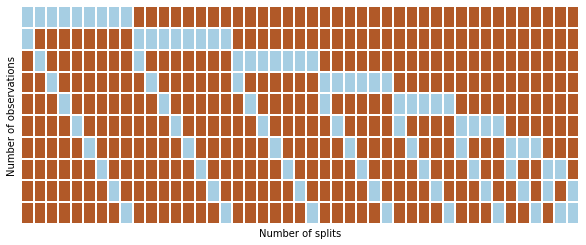

In [248]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeavePOut

fig,ax = plt.subplots(figsize=(10,4))
params = {"xticklabels" : 0,
          "yticklabels" : 0,
          "annot": False,
          "cbar": False,
          "linewidths" : 1,
          'cmap': 'Paired'}
Leave_p, N = 0.2, 10
N_test = int(N*Leave_p)
Y = np.ones(N)
lpo=LeavePOut(N_test)
data = []
for i, (train, test) in enumerate(lpo.split(Y)):
    tmp = np.ones(N)
    tmp[test]=0
    data.append(tmp)
sns.heatmap(pd.DataFrame(data).T,  ax=ax, **params)
ax.set_xlabel('Number of splits')
ax.set_ylabel('Number of observations')


Text(86.0, 0.5, 'Number of observations')

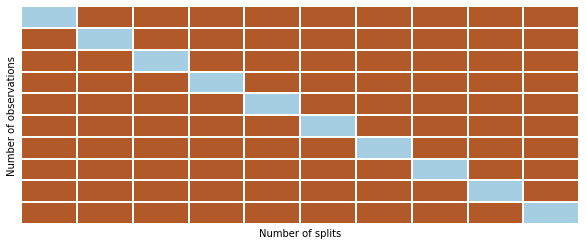

In [227]:
fig, ax = plt.subplots(figsize=(10, 4))
Y = np.ones(N)
lpo = LeavePOut(1)
data = []
for i, (train, test) in enumerate(lpo.split(Y)):
    tmp = np.ones(N)
    tmp[test] = 0
    data.append(tmp)
sns.heatmap(pd.DataFrame(data).T,  ax=ax, **params)
ax.set_xlabel('Number of splits')
ax.set_ylabel('Number of observations')


Text(0.5, 32.0, 'Number of observations')

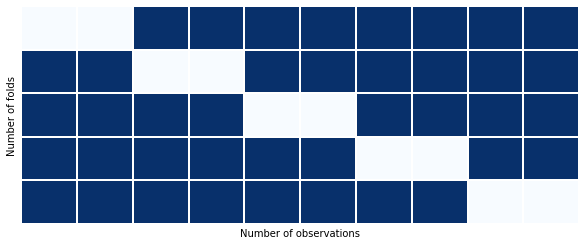

In [246]:
from sklearn.model_selection import KFold
fig, ax = plt.subplots(figsize=(10, 4))
Y = np.ones(N)
kf = KFold(5)
data = []
for i, (train, test) in enumerate(kf.split(Y)):
    tmp = np.ones(N)
    tmp[test] = 0
    data.append(tmp)
sns.heatmap(pd.DataFrame(data),  ax=ax, **params)
ax.set_ylabel('Number of folds')
ax.set_xlabel('Number of observations')


<AxesSubplot:>

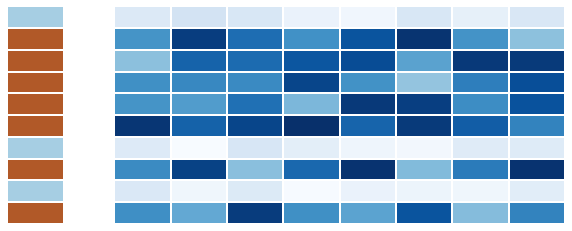

In [252]:
from sklearn.model_selection import train_test_split
N = 10
X = rng.uniform(1,2,size=(N, 8))
Y = rng.choice([0, 1], p=(0.35, 0.65), size=(N, 1))
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=2021)

fig, ax = plt.subplots(1, 2, figsize=(
    10, 4), gridspec_kw={'width_ratios': [1, 8]})
params['cmap'] = 'Paired'
sns.heatmap(pd.DataFrame(Y),  ax=ax[0], **params)
params['cmap'] = 'Blues'
sns.heatmap(pd.DataFrame(X+2*X*Y),  ax=ax[1], **params)


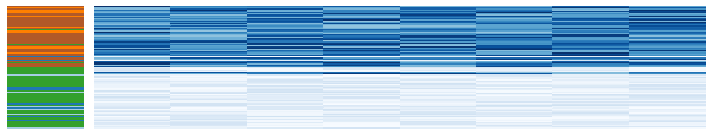

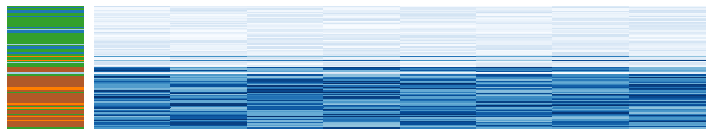

In [261]:
from sklearn.model_selection import StratifiedKFold
N = 100
X = rng.uniform(1, 2, size=(N, 8))
Y = rng.choice([1, 2, 3], p=(0.10, 0.25, 0.65), size=(N, 1))
K = 2
skf = StratifiedKFold(K)
params["linewidths"]=0
data = []
for i, (train, test) in enumerate(skf.split(X, Y)):
    fig, ax = plt.subplots(1, 2, figsize=(
        10, 2), gridspec_kw={'width_ratios': [1, 8]})
    C = np.ones((N, 1))
    C[train] = 0
    params['cmap'] = 'Paired'
    sns.heatmap(pd.DataFrame(Y+Y*C*2),  ax=ax[0], **params)
    params['cmap'] = 'Blues'
    sns.heatmap(pd.DataFrame(X+X*C*2),  ax=ax[1], **params)
    plt.tight_layout()


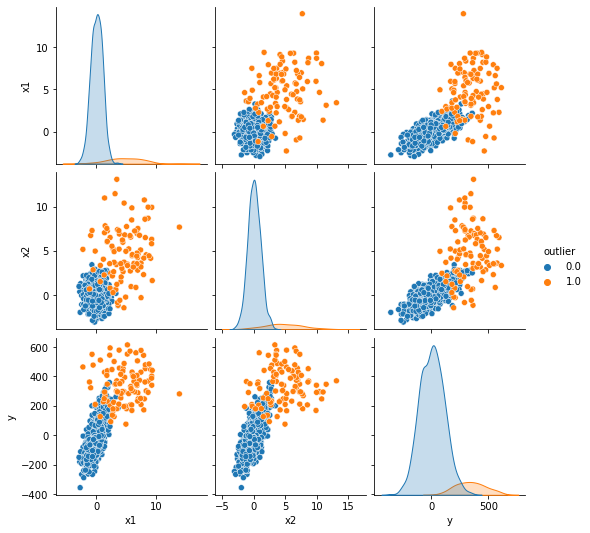

In [307]:
from sklearn.datasets import make_regression
N = 1000
N_outlier = 100
Noise = (5,3,0.1)
outlier = np.repeat([False, True], [N-N_outlier, N_outlier])
X, y, coef = make_regression(n_samples=N,
                             n_features=2,
                             n_informative=2,
                             noise=3,
                             coef=True,
                             random_state=2021)

X[outlier] = X[outlier] + \
    rng.normal(loc=Noise[0], scale=Noise[1], size=(N_outlier, X.shape[1]))
y[outlier] = y[outlier] + \
    rng.normal(loc=np.max(y), scale=np.ptp(y)*Noise[2], size=(N_outlier,))
df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1), outlier.reshape(-1, 1)]),
                  columns=['x1', 'x2', 'y', 'outlier'])
sns.pairplot(df, hue='outlier')


In [308]:
coef


array([75.81803908, 74.5879675 ])

In [310]:
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor

def calc_error(y, y_hat, i=None, kind='model'):
    err = {'Kind': kind,
           'MAD': median_absolute_error(y, y_hat),
           'r2': r2_score(y, y_hat)}
    return pd.DataFrame(err, index=[i])


In [339]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import BayesianRidge

models = {'Bayesian': BayesianRidge(),
          'RandomForest': RandomForestRegressor()}
n_perms = 100
ss = ShuffleSplit(n_splits=n_perms, test_size=0.25, random_state=2021)
score = pd.DataFrame()
for i, (ix_train, ix_test) in enumerate(ss.split(X)):
    X_train, X_test = X[ix_train, :], X[ix_test, :]
    y_train, y_test = y[ix_train], y[ix_test]
    for key,mdl in models.items():
        y_hat = mdl.fit(X_train, y_train).predict(X_test)
        score = score.append(calc_error(y_test, y_hat, i, key))


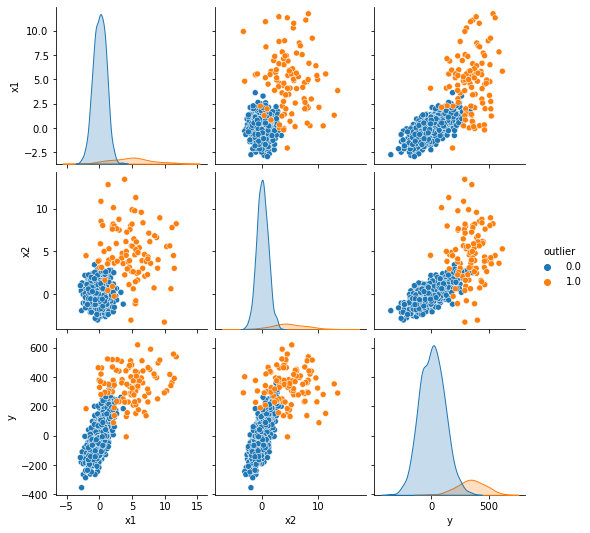

In [344]:
def make_dataset(N=1000,
                 N_outlier=100,
                 Noise=(5, 3, 0.1),
                 plot=True,
                 SEED=2021):
    outlier = np.repeat([False, True], [N-N_outlier, N_outlier])
    X, y, coef = make_regression(n_samples=N,
                                 n_features=2,
                                 n_informative=2,
                                 noise=3,
                                 coef=True,
                                 random_state=SEED)

    X[outlier] = X[outlier] + \
        rng.normal(loc=Noise[0], scale=Noise[1], size=(N_outlier, X.shape[1]))
    y[outlier] = y[outlier] + \
        rng.normal(loc=np.max(y), scale=np.ptp(y)*Noise[2], size=(N_outlier,))
    df = pd.DataFrame(np.hstack(
        [X, y.reshape(-1, 1), outlier.reshape(-1, 1)]), columns=['x1', 'x2', 'y', 'outlier'])
    sns.pairplot(df, hue='outlier')


make_dataset()


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-35.318196,198,two-sided,2.072468e-87,"[-0.22, -0.2]",4.994747,2.507e+83,1.0


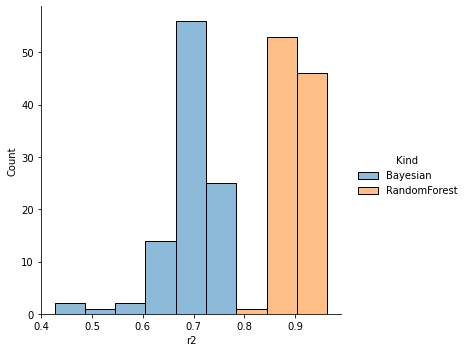

In [341]:
ix = score.Kind == 'Bayesian'
sns.displot(x='r2',hue='Kind',data=score)
pg.ttest(score[ix].r2.values, score[-ix].r2.values)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,146.876234,198,two-sided,4.738621e-204,"[37.81, 38.84]",20.771436,2.337e+199,1.0


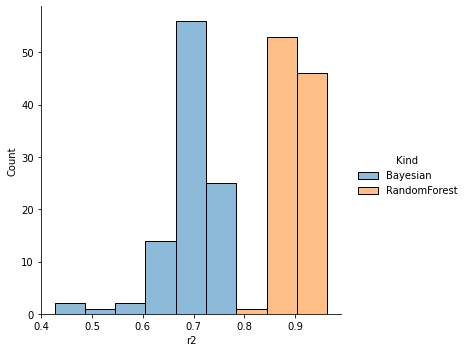

In [342]:
sns.displot(x='r2', hue='Kind', data=score)
pg.ttest(score[ix].MAD.values, score[-ix].MAD.values)


In [352]:
def make_dataset(N=1000,
                 N_outlier=100,
                 Noise=(5, 3, 0.1),
                 plot=True,
                 SEED=2021):
    outlier = np.repeat([False, True], [N-N_outlier, N_outlier])
    X, y, coef = make_regression(n_samples=N,
                                 n_features=2,
                                 n_informative=2,
                                 noise=3,
                                 coef=True,
                                 random_state=SEED)

    X[outlier] = X[outlier] + \
        rng.normal(loc=Noise[0], scale=Noise[1], size=(N_outlier, X.shape[1]))
    y[outlier] = y[outlier] + \
        rng.normal(loc=np.max(y), scale=np.ptp(y)*Noise[2], size=(N_outlier,))
    df = pd.DataFrame(np.hstack(
        [X, y.reshape(-1, 1), outlier.reshape(-1, 1)]), columns=['x1', 'x2', 'y', 'outlier'])
    if plot:sns.pairplot(df, hue='outlier')
    return X, y, df


In [365]:
import pingouin as pg
score_ideal = pd.DataFrame()
obs = 10
for i in range(obs):
    seed = rng.integers(1e9)
    X, y, _ = make_dataset(plot=False, SEED=seed)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=2021)
    for key, mdl in models.items():
        y_hat = mdl.fit(X_train, y_train).predict(X_test)
        score_ideal = score_ideal.append(calc_error(y_test, y_hat, i, key))


<AxesSubplot:xlabel='r2', ylabel='MAD'>

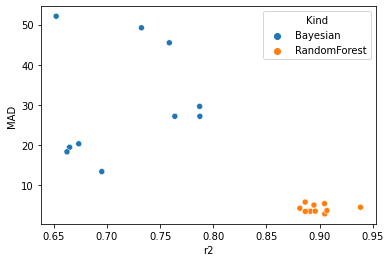

In [361]:
sns.scatterplot(x='r2',y='MAD', hue='Kind', data=score)


In [ ]:
sns.displot(x='r2', hue='Kind', data=score)
ix = score.Kind =='Bayesian'
pg.ttest(score[ix].r2.values, score[-ix].r2.values)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.919524,18,two-sided,0.000013,"[16.74, 35.17]",2.647292,1105.02,0.999854


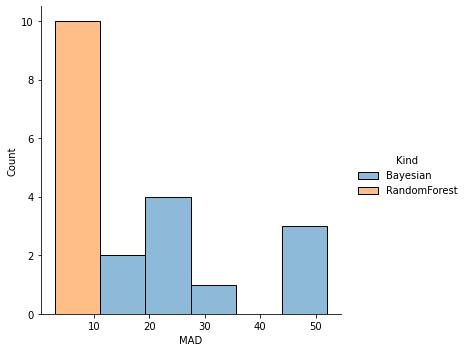

In [357]:
sns.displot(x='MAD', hue='Kind', data=score)
ix = score.Kind == 'Bayesian'
pg.ttest(score[ix].MAD.values, score[-ix].MAD.values)


Text(0.5, 1.0, 'Naive 10xCV')

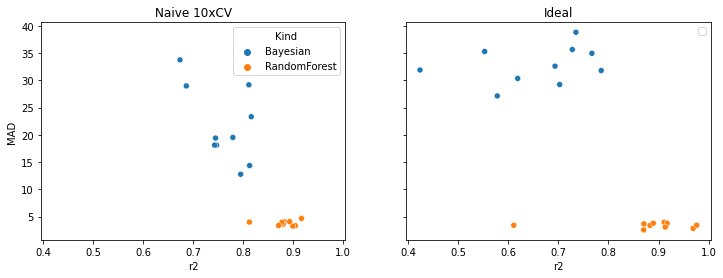

In [377]:
score_naive = pd.DataFrame()
X, y, _ = make_dataset(plot=False, SEED=seed)
kfolds = 10
kf = KFold(n_splits=kfolds, random_state=seed,shuffle=True)
for i, (train, test) in enumerate(kf.split(X)):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    for key, mdl in models.items():
        y_hat = mdl.fit(X_train, y_train).predict(X_test)
        score_naive = score_naive.append(calc_error(y_test, y_hat, i, key))
fig,ax = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)        
sns.scatterplot(x='r2', y='MAD', hue='Kind', data=score_ideal,  ax=ax[0])
sns.scatterplot(x='r2', y='MAD', hue='Kind', data=score_naive,ax=ax[1])
ax[1].legend([])
ax[1].set_title('Ideal')
ax[0].set_title('Naive 10xCV')



In [380]:
ix = score_ideal.Kind == 'Bayesian'
display(pg.ttest(score_ideal[ix].MAD.values, score_naive[ix].MAD.values))
ix = score_ideal.Kind == 'RandomForest'
display(pg.ttest(score_ideal[ix].MAD.values, score_naive[ix].MAD.values))


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-4.526729,18,two-sided,0.000261,"[-16.14, -5.91]",2.024415,88.861,0.989672


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.040678,18,two-sided,0.056228,"[-0.01, 0.82]",0.912619,1.575,0.488669


In [378]:
ix = score_ideal.Kind == 'RandomForest'
pg.ttest(score_ideal[ix].MAD.values, score_naive[ix].MAD.values)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.040678,18,two-sided,0.056228,"[-0.01, 0.82]",0.912619,1.575,0.488669


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-4.616851,18,two-sided,0.000214,"[-0.32, -0.12]",2.064718,104.642,0.991779


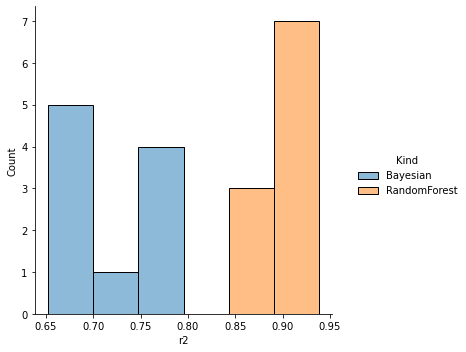

In [381]:
sns.displot(x='r2', hue='Kind', data=score)
ix = score_naive.Kind == 'Bayesian'
pg.ttest(score_naive[ix].r2.values, score_naive[-ix].r2.values)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,26.623884,18,two-sided,6.572353e-16,"[27.07, 31.71]",11.906563,3.42e+12,1.0


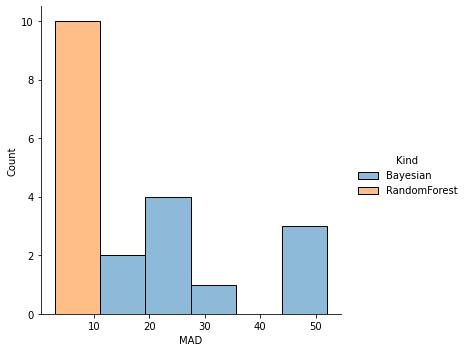

In [382]:
sns.displot(x='MAD', hue='Kind', data=score)
ix = score_naive.Kind == 'Bayesian'
pg.ttest(score_naive[ix].MAD.values, score_naive[-ix].MAD.values)


In [387]:
ix = score_naive.Kind == 'Bayesian'
display(pg.wilcoxon(score_naive[ix].MAD.values, score_naive[-ix].MAD.values))
display(pg.wilcoxon(score_naive[ix].r2.values, score_naive[-ix].r2.values))


,W-val,tail,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.001953,1.0,1.0


,W-val,tail,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.001953,-1.0,0.07


In [388]:
score_naive[ix].r2.values
score_naive[ix].r2.values


array([0.57767196, 0.42326508, 0.61857725, 0.70247726, 0.55242012,
       0.78539375, 0.7668323 , 0.72770395, 0.69312746, 0.73494606])

<AxesSubplot:>

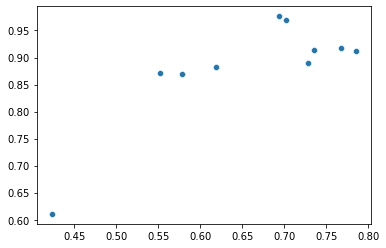

In [389]:
sns.scatterplot(x=score_naive[ix].r2.values, y=score_naive[-ix].r2.values)


Text(0.5, 1.0, 'Bootstrap')

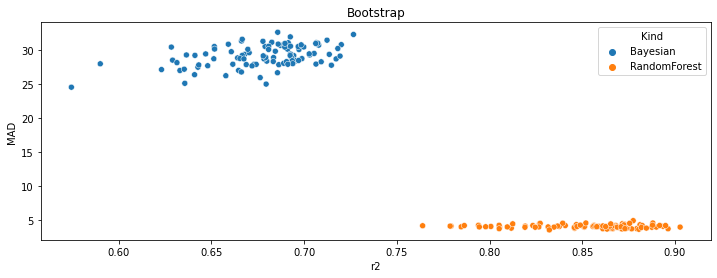

In [393]:
from sklearn.model_selection import ShuffleSplit
score_boot = pd.DataFrame()
X, y, _ = make_dataset(plot=False, SEED=seed)
n_perms = 100
ss = ShuffleSplit(n_splits=n_perms, test_size=0.5, random_state=2021)
for i, (train, test) in enumerate(ss.split(X)):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    for key, mdl in models.items():
        y_hat = mdl.fit(X_train, y_train).predict(X_test)
        score_boot = score_boot.append(calc_error(y_test, y_hat, i, key))
fig, ax = plt.subplots(figsize=(12, 4), sharex=True, sharey=True)
sns.scatterplot(x='r2', y='MAD', hue='Kind', data=score_boot,  ax=ax)
ax.set_title('Bootstrap')


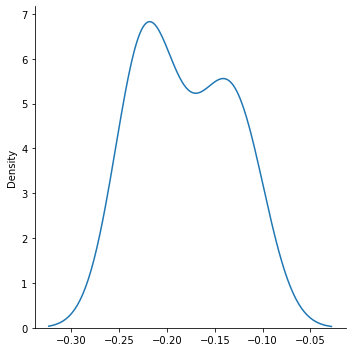

In [400]:
sns.displot(score[ix].r2.values-score[-ix].r2.values, kind='kde')
